In [39]:
import pandas as pd

In [40]:
notas = pd.read_csv("DB/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [41]:
notas.shape

(100836, 4)

In [42]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [43]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [44]:
notas["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [45]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [46]:
notas["nota"].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [47]:
notas["nota"].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

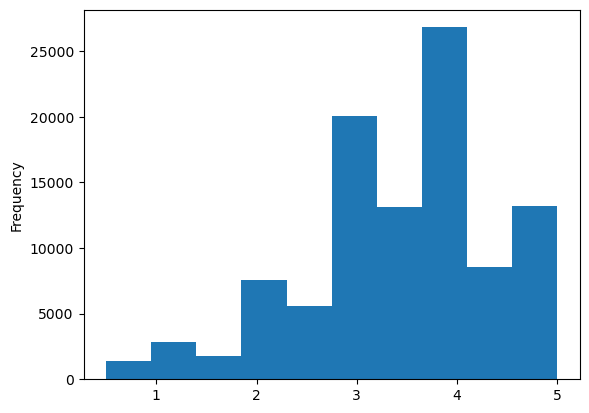

In [48]:
# Gráficos
notas["nota"].plot(kind="hist")

In [49]:
mediana = notas["nota"].median()
media = notas["nota"].mean()

print(f"Mediana é {mediana}")
print(f"Média é {media}")

Mediana é 3.5
Média é 3.501556983616962


In [50]:
notas["nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [51]:
import seaborn as sns

<Axes: >

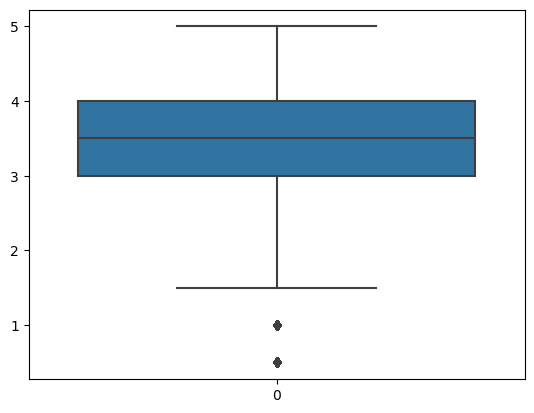

In [66]:
# Verificando o miolo das notas 
sns.boxplot(notas["nota"])

In [53]:
filmes = pd.read_csv('DB/movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [54]:
notas.query("filmeId==1")["nota"].mean()

3.9209302325581397

In [55]:
notas.query("filmeId==2")["nota"].mean()

3.4318181818181817

In [56]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()

<Axes: ylabel='Frequency'>

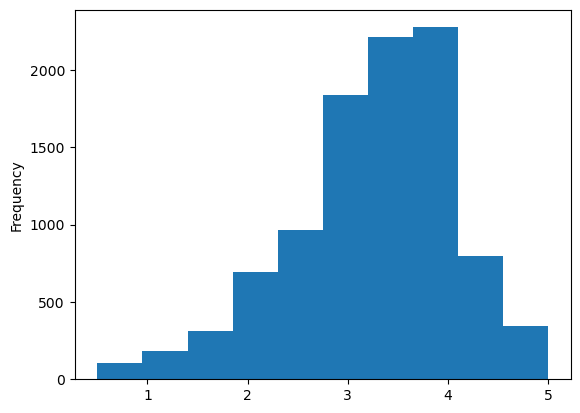

In [57]:
medias_por_filme.plot(kind="hist")

In [69]:
# A divisória meio a meio é em 3.41
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


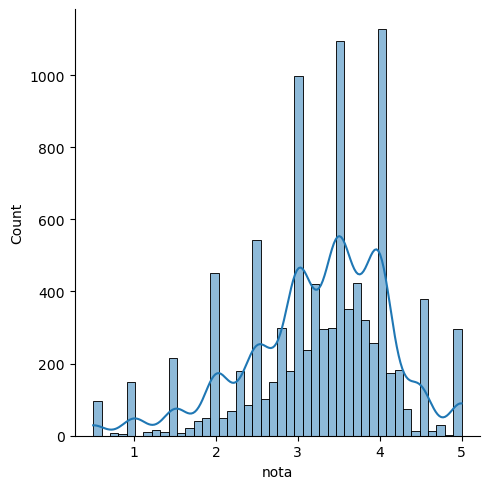

In [70]:
sns.displot(medias_por_filme, kde = True) # Criando um histograma dos filmes com o KDE, uma curva de distribuição

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histograma das medias dos filmes')

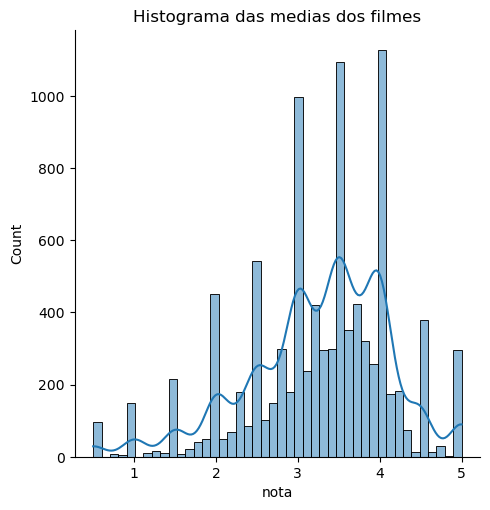

In [73]:
import matplotlib.pyplot as plt

# A ORDEM DOS PLOT É IMPORTANTE 
sns.displot(medias_por_filme, kde = True)
plt.title('Histograma das medias dos filmes')